<a href="https://colab.research.google.com/github/shreyyeahh/Linear_Regression_code_from_scratch/blob/main/LinearRegressionfromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
class MyLR:
  def __init__(self):
    self.m = None # slope
    self.b = None # y intercept

  def fit(self , x_train , y_train): # to train model means calculating the value of m and b that minimises the error to find the best fit line
      num = 0
      den = 0
      for i in range(x_train.shape[0]):
        num = num +(x_train[i]-x_train.mean()) * (y_train[i]-y_train.mean())
        den = den +(x_train[i]-x_train.mean()) * (x_train[i]-x_train.mean())

      self.m = num/den
      self.b = y_train.mean() - (self.m * x_train.mean())
      print(self.m)
      print(self.b)


  def predict(self , x_test):
    print(x_test)
    print(self.m * x_test + self.b) # concept of broadcasting ismused here , the operation is performed with every element of the array
    return self.m * x_test + self.b

In [9]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv('/content/placement.csv')
x = df.iloc[:,0].values
y = df.iloc[:,1].values

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [12]:
lr = MyLR()
lr.fit(x_train,y_train)

1.0989327142272172
-2.2010772012587614


In [13]:
print(y_test)

[4.04 8.53 2.47 4.32 4.12 4.96 7.48 5.28 6.39 4.79 4.48 7.31 6.95 4.19
 5.33 4.1  4.6  3.68 4.31 2.98]


In [14]:
y_pred = lr.predict(x_test)

[5.32 8.04 5.44 7.28 6.52 6.83 8.66 7.57 7.96 6.06 5.54 8.8  8.86 5.91
 6.87 5.7  7.99 5.23 6.36 5.58]
[3.64524484 6.63434182 3.77711676 5.79915296 4.9639641  5.30463324
 7.3156801  6.11784345 6.5464272  4.45845505 3.88701004 7.46953068
 7.53546665 4.29361514 5.34859055 4.06283927 6.57939519 3.54634089
 4.78813486 3.93096734]


In [15]:
from sklearn.metrics import mean_absolute_error , mean_squared_error, root_mean_squared_error , r2_score , adjusted_rand_score

In [16]:
print("MAE", mean_absolute_error(y_test , y_pred))

MAE 0.6397463050551035


In [17]:
print("MSE", mean_squared_error(y_test , y_pred))

MSE 0.7570681891233689


R² measures how much variation in the target (package) is explained by the input features.

In [18]:
print("R2 score " , r2_score(y_test , y_pred)) # cgpa is only explaining the 67% variance in the predicted values of y , rest we dont know
r2 = r2_score(y_test , y_pred)
n = x_test.shape[0]
p = 1
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adjusted_r2)

R2 score  0.6755298863853143
0.6575037689622762


In [19]:
new_df = df.copy()
new_df['random_feature'] = np.random.random(len(df))
new_df = new_df[['cgpa' , 'random_feature', 'package']]
print(new_df.head())


   cgpa  random_feature  package
0  6.87        0.760666     5.33
1  9.75        0.039481     8.40
2  8.66        0.811241     7.48
3  7.99        0.217665     4.60
4  5.78        0.939350     3.72


In [20]:
x = new_df.iloc[:,0:2].values
y = new_df.iloc[:,-1].values

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [22]:
new_lr = LinearRegression()
new_lr.fit(x_train , y_train)

LinearRegression()

In [23]:
y_pred = new_lr.predict(x_test)
print(y_pred)
print(y_test)


[3.8124379  6.72074128 3.66444894 5.69255569 4.82585906 5.34945144
 7.17228845 6.02253885 6.66613271 4.62648684 4.00142401 7.42189347
 7.47896661 4.40238382 5.24727249 4.03287455 6.65143463 3.52672242
 4.61246357 4.03463173]
[4.04 8.53 2.47 4.32 4.12 4.96 7.48 5.28 6.39 4.79 4.48 7.31 6.95 4.19
 5.33 4.1  4.6  3.68 4.31 2.98]


In [24]:
import matplotlib.pyplot as plt

In [25]:
print("R2 score", r2_score(y_test , y_pred))

R2 score 0.6989558780057501


Text(0, 0.5, 'Package(in lpa)')

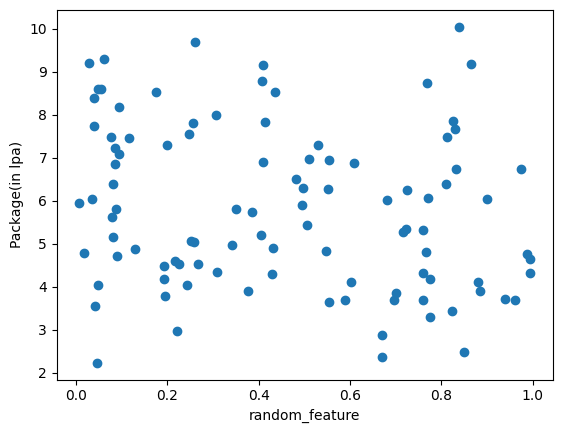

In [26]:
plt.scatter(new_df['random_feature'],new_df['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [27]:
adjusted_r2 = 1-(1-r2_score(y_test , y_pred))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)
print(adjusted_r2)

0.6635389224770148


Since iq is strongly derived from package, it's highly correlated with it.

Model can now explain target better.

➕ R² increases

➕ Adjusted R² also increases, because the feature added true value

In [28]:
# multiple linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , root_mean_squared_error ,r2_score


In [29]:
import pandas as pd
import numpy as np

In [31]:
df1 = pd.read_csv('/content/logical_regression_data.csv')
df1.head()

,cgpa,iq,hours_studied,package
0,7.50,89.80,4.82,14.22
1,9.80,103.48,9.16,16.57
2,8.93,104.40,2.00,11.40
3,8.39,89.28,5.43,12.52
4,6.62,127.99,1.10,10.72


In [32]:
x = df1.iloc[:,:3].values
y = df1.iloc[:,-1].values

In [33]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , random_state=3)
lr1 = LinearRegression()
lr1.fit(x_train , y_train)


LinearRegression()

In [34]:
print(y_test)

[10.42 14.37 13.93 15.9  11.58 15.19 16.64 15.02 17.51 14.85 11.72 14.49
 16.33  9.32 13.75 13.17 11.73 12.52 11.33 14.08 12.14 11.93 15.19 10.93
 12.41 13.05 14.27 12.87 13.66 13.66 12.02 11.88 10.4  14.06 13.09 13.47
 10.72  8.96 16.24  8.98]


In [35]:
y_pred = (lr1.predict(x_test))
print(y_pred)

[11.25577926 15.52655003 14.45222871 14.01772393 12.47961439 14.834248
 13.85676013 13.76396066 15.6901791  13.2463774  12.24237863 13.33225305
 15.10997164 10.99059528 15.36896153 10.74826752 12.90712843 12.66266004
 11.04134639 12.26385425 11.93828934 11.68794134 16.07162382  9.31955601
 13.8819885  12.76133155 11.34191639 12.64906759 14.34119628 12.99909914
 11.27816391 13.52644124 10.58938822 13.44213208 13.03965582 13.92623455
 11.85981913 11.98449678 12.93012328 10.75205657]


In [36]:
print("MAE", mean_absolute_error(y_test , y_pred))
print("MSE", mean_squared_error(y_test , y_pred))
print("R2 Score", r2_score(y_test , y_pred))

MAE 1.1821730721301473
MSE 2.12090801647951
R2 Score 0.5083616585714528


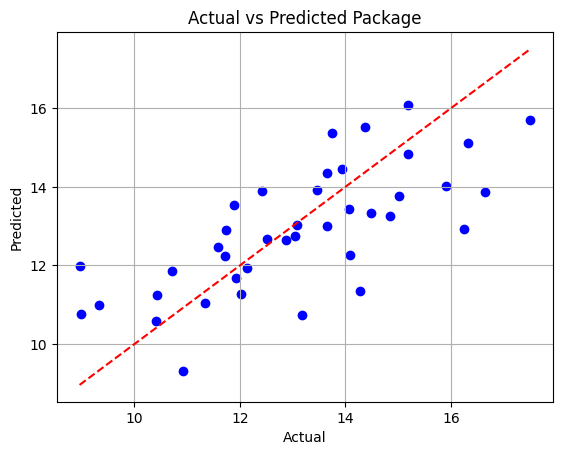

In [37]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # perfect prediction line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Package")
plt.grid(True)
plt.show()


In [38]:
# simple ploynomial linear regression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1) # y = (b0 * (x**0)) + (b1*(x**1)) + (b2*(x**2)) + c


In [52]:
print(X)
print(y)

[[-1.08244538]
 [-1.91495328]
 [-1.14868514]
 [-0.65552078]
 [-1.29674307]
 [ 0.66041908]
 [ 0.93356118]
 [ 2.72728348]
 [ 0.47076141]
 [-0.13802007]
 [-2.64088302]
 [ 1.0059858 ]
 [-1.20551808]
 [-1.36137962]
 [ 1.00650349]
 [-2.29812391]
 [ 0.50211073]
 [ 1.84589313]
 [-0.88482996]
 [-0.016252  ]
 [ 2.07163834]
 [-0.31051923]
 [-1.35770057]
 [-2.14410545]
 [-0.8930174 ]
 [ 0.70621019]
 [-2.04313788]
 [ 0.05067991]
 [-1.82749351]
 [ 2.91455878]
 [ 1.39010382]
 [ 1.5900922 ]
 [ 2.00534539]
 [-0.75552464]
 [ 1.44741811]
 [ 0.25541029]
 [-1.98362985]
 [-0.50699542]
 [ 2.45658102]
 [ 0.61703813]
 [-2.52908377]
 [ 1.30404061]
 [-0.03297065]
 [ 2.29821592]
 [-0.35046365]
 [ 2.95554059]
 [-2.19427384]
 [-0.47184433]
 [ 0.45264774]
 [ 1.44935867]
 [ 0.0174609 ]
 [-2.64881488]
 [ 2.42859427]
 [ 2.30273762]
 [-2.50051073]
 [ 1.76877116]
 [ 2.0538762 ]
 [-1.37052234]
 [-2.17658599]
 [ 1.91910008]
 [ 2.74052803]
 [ 0.3644442 ]
 [ 2.90257323]
 [-1.31577092]
 [ 0.47440011]
 [ 0.5536187 ]
 [-1.65418

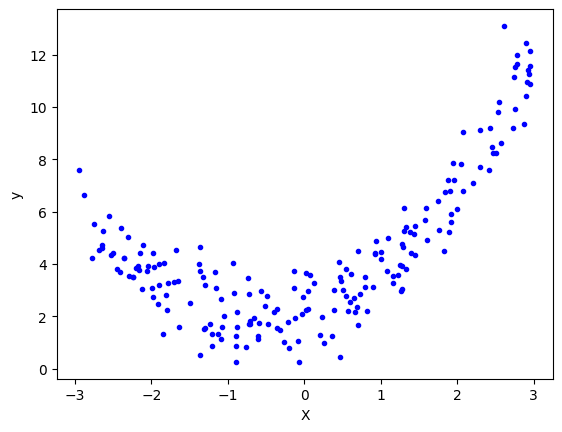

In [40]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [41]:
x_train , x_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 2)

In [54]:
poly = PolynomialFeatures(degree=2)   #polynomial features are applied only on x(features) not on y
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [55]:
print(x_train[0])
print(x_train_poly[0])

[-2.55673616]
[ 1.         -2.55673616  6.53689977]


In [56]:
lr = LinearRegression()
lr.fit(x_train_poly,y_train)

LinearRegression()

In [57]:
print(x_test_poly)

[[ 1.00000000e+00 -9.35907827e-01  8.75923461e-01]
 [ 1.00000000e+00  2.91455878e+00  8.49465287e+00]
 [ 1.00000000e+00  2.07859539e+00  4.32055881e+00]
 [ 1.00000000e+00  1.22938617e+00  1.51139036e+00]
 [ 1.00000000e+00  2.75472841e+00  7.58852863e+00]
 [ 1.00000000e+00  5.46289488e-02  2.98432205e-03]
 [ 1.00000000e+00 -2.64088302e+00  6.97426313e+00]
 [ 1.00000000e+00 -2.50051073e+00  6.25255389e+00]
 [ 1.00000000e+00  2.47599510e+00  6.13055171e+00]
 [ 1.00000000e+00  2.55410285e-01  6.52344139e-02]
 [ 1.00000000e+00 -1.20551808e+00  1.45327384e+00]
 [ 1.00000000e+00 -1.16774456e+00  1.36362736e+00]
 [ 1.00000000e+00 -1.36137962e+00  1.85335448e+00]
 [ 1.00000000e+00  1.30909889e+00  1.71373991e+00]
 [ 1.00000000e+00 -1.12102063e+00  1.25668725e+00]
 [ 1.00000000e+00 -1.14868514e+00  1.31947754e+00]
 [ 1.00000000e+00 -3.50463651e-01  1.22824771e-01]
 [ 1.00000000e+00 -6.55520778e-01  4.29707490e-01]
 [ 1.00000000e+00 -1.97824023e+00  3.91343442e+00]
 [ 1.00000000e+00  1.00650349e+

In [59]:
y_pred = lr.predict(x_test_poly)
print(y_pred)

[[ 1.94286212]
 [11.34132973]
 [ 7.31946443]
 [ 4.35906423]
 [10.48740849]
 [ 2.13325321]
 [ 5.22863748]
 [ 4.78543203]
 [ 9.09434224]
 [ 2.35991493]
 [ 2.15817176]
 [ 2.12112046]
 [ 2.33478287]
 [ 4.58871985]
 [ 2.07839407]
 [ 2.10327712]
 [ 1.86892113]
 [ 1.84019732]
 [ 3.40854624]
 [ 3.7699582 ]
 [ 3.7993443 ]
 [ 3.09977316]
 [ 3.59412888]
 [ 2.79237059]
 [ 3.13604751]
 [ 2.51561029]
 [11.56675275]
 [ 2.81356004]
 [ 2.64430086]
 [ 6.85534753]
 [ 2.54868558]
 [ 2.67940982]
 [ 1.97536598]
 [ 2.34632889]
 [ 1.8340579 ]
 [ 1.83753885]
 [ 3.23631485]
 [ 4.46877704]
 [ 7.85093414]
 [ 8.29000083]]


In [60]:
print("R2 Score " , r2_score(y_test , y_pred))

R2 Score  0.8560333187784364
